In [2]:
from bs4 import BeautifulSoup
import requests

In [7]:
MAIN_PAGE = 'https://lotr.fandom.com'
CHARS_PAGE_SUFFIX = 'wiki/Category:The_Silmarillion_Characters'
CHARS_LINK_TAG_CLASS = {'class': 'category-page__member-link'}
response = requests.get(f'{MAIN_PAGE}/{CHARS_PAGE_SUFFIX}')

In [8]:
soup = BeautifulSoup(response.content)

In [9]:
atagsList = soup.findAll('a', CHARS_LINK_TAG_CLASS)

In [10]:
char_map = dict()
for atag in atagsList:
    char_map[atag['title']] = MAIN_PAGE + atag['href']

In [11]:
for k, v in char_map.items():
    print(k, v)

Aegnor https://lotr.fandom.com/wiki/Aegnor
Aerandir https://lotr.fandom.com/wiki/Aerandir
Aerin https://lotr.fandom.com/wiki/Aerin
Aghan https://lotr.fandom.com/wiki/Aghan
Amandil https://lotr.fandom.com/wiki/Amandil
Amarië https://lotr.fandom.com/wiki/Amari%C3%AB
Amlach https://lotr.fandom.com/wiki/Amlach
Amras https://lotr.fandom.com/wiki/Amras
Amrod https://lotr.fandom.com/wiki/Amrod
Ancalagon https://lotr.fandom.com/wiki/Ancalagon
Andreth https://lotr.fandom.com/wiki/Andreth
Andróg https://lotr.fandom.com/wiki/Andr%C3%B3g
Angrim https://lotr.fandom.com/wiki/Angrim
Angrod https://lotr.fandom.com/wiki/Angrod
Annael https://lotr.fandom.com/wiki/Annael
Ar-Adûnakhôr https://lotr.fandom.com/wiki/Ar-Ad%C3%BBnakh%C3%B4r
Ar-Gimilzôr https://lotr.fandom.com/wiki/Ar-Gimilz%C3%B4r
Ar-Pharazôn https://lotr.fandom.com/wiki/Ar-Pharaz%C3%B4n
Ar-Sakalthôr https://lotr.fandom.com/wiki/Ar-Sakalth%C3%B4r
Ar-Zimrathôn https://lotr.fandom.com/wiki/Ar-Zimrath%C3%B4n
Aranwë https://lotr.fandom.com/wiki/Ar

In [40]:
url_list = list(char_map.values())
url_list.__len__()

200

In [13]:
from requests_futures.sessions import FuturesSession

In [29]:
firstTen = url_list[:10]
firstTen.__len__()

10

In [30]:
session = FuturesSession(max_workers=10)

In [39]:
%%timeit -r 1 -n 1
futures = [session.get(url) for url in url_list]
for each in futures:
    print(each.result())

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

<Response [200]>

In [35]:
resOne = futures[0].result()

1.106-1.849-1.106-3.092 0-1.301.38-2.367 1.14-3.196.76-.83 1.783-1.244 3.071-1.244 1.242 0 2.24.409 2.995 1.227.719.794 1.079 1.819 1.079 3.075zm6.108-2.489a3.281 3.281 0 0 0-.592-.05c-.661 0-1.172.247-1.532.742-.314.438-.47.99-.47 1.658v4.406h-1.878l.016-5.752c0-.969-.023-1.85-.07-2.645h1.638l.068 1.607h.052c.198-.552.512-.997.94-1.33.418-.3.871-.449 1.358-.449.174 0 .331.012.47.034v1.78m6.613 1.676c.013-.553-.11-1.03-.365-1.434-.325-.518-.825-.777-1.497-.777-.615 0-1.115.252-1.496.76-.314.403-.5.887-.556 1.45h3.914zm1.792.484c0 .334-.022.616-.069.846h-5.637c.022.83.294 1.463.817 1.901.475.391 1.09.587 1.844.587.834 0 1.596-.133 2.281-.398l.294 1.296c-.8.346-1.745.519-2.835.519-1.312 0-2.342-.384-3.09-1.15-.747-.766-1.123-1.794-1.123-3.084 0-1.267.347-2.32 1.046-3.16.73-.9 1.716-1.348 2.957-1.348 1.219 0 2.142.448 2.769 1.347.497.714.746 1.596.746 2.643zM42.263 8.783c0-.667-.178-1.18-.535-1.536-.357-.356-.877-.535-1.56-.535-.292 0-.54.02-.745.06v4.277c.114.018.322.026.624.026.707 0 1.
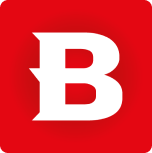

In [36]:
resOne.content

In [42]:
def makeSoups(url_list):
    session = FuturesSession(max_workers=10)
    session_list = [
        session.get(url) for url in url_list
    ]
    soups = list()
    for each_session in session_list:
        result = each_session.result()
        soups.append(result.content)
    
    return soups

In [43]:
bazinga = makeSoups(url_list)

In [44]:
len(bazinga)

200

In [48]:
def makeSoups(url_list):
    session = FuturesSession(max_workers=10)
    session_list = [
        session.get(url) for url in url_list
    ]
    soups = list()
    for each_session in session_list:
        result = each_session.result()
        soups.append(result.content)
    
    return soups

In [47]:
%%timeit -r 1 -n 1
bazingaOneHundred = makeSoups(url_list)

50.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [49]:
%%timeit -r 1 -n 1
bazingaOneHundred = makeSoups(url_list)

1min 3s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [3]:
soup = BeautifulSoup(requests.get('https://lotr.fandom.com/wiki/Aegnor').content)

In [5]:
sidebar = soup.find('aside', class_='portable-infobox pi-background pi-theme-High-Elves pi-layout-default')

In [7]:
sidebar.find_next('h2', {'data-source': 'name'})

<h2 class="pi-item pi-item-spacing pi-title" data-source="name">Aegnor</h2>

In [16]:
def getNameAndRace(soup):
    sidebar = soup.find('aside', class_='portable-infobox pi-background pi-theme-High-Elves pi-layout-default')
    if sidebar and name:
        name = sidebar.find('h2', {
            'data-source' : 'name'
            }).text
        race_div = sidebar.find('div', {
            'class' : 'pi-item pi-data pi-item-spacing pi-border-color',
            'data-source' : 'race'
        })
        race = race_div.find('a')['title']
    else:
        race = 0
    return name, race

In [17]:
getNameAndRace(soup)

('Aegnor', 'Elves')

In [18]:
def getNameAndRaceImproved(soup):
    name = soup.find('h1', {
        'class' : 'page-header__title'
        }).text
    sidebar = soup.find('aside', class_='portable-infobox pi-background pi-theme-High-Elves pi-layout-default')
    if sidebar:
        race_div = sidebar.find('div', {
            'class' : 'pi-item pi-data pi-item-spacing pi-border-color',
            'data-source' : 'race'
        })
        race = race_div.find('a')['title']
    else:
        race = 0
    return name, race

In [19]:
getNameAndRace(soup)

('Aegnor', 'Elves')

In [20]:
soup = BeautifulSoup(
    requests.get(
        'https://lotr.fandom.com/wiki/Aerandir'
    ).content
)

In [21]:
getNameAndRaceImproved(soup)

('Aerandir', 0)

In [24]:
import os
os.path.abspath('output/testfile.txt')


'c:\\Users\\tehse\\Desktop\\Crusade\\silmarillion_scrape\\script\\output\\testfile.txt'